<a href="https://colab.research.google.com/github/JOHNPAUL-ADIMS/ATM/blob/main/FUEL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FUEL ANALYSIS 

> This is a fuel analysis for Air Peace, with the aim of determining the fuel useage and optimisation



In [25]:
import pandas as pd
import numpy as np
import calendar


In [26]:
# Importing data

data = "/content/drive/MyDrive/data document/Fuelanalysis2.xlsx"
df = pd.read_excel(data)
cols = df.columns.tolist()
cols
pd.reset_option("^display")
df = df.reindex(columns=[
 'Date (UTC)',
 'year',
 'month',
 'Registration',
 'Origin',
 'Destination',
 'Out (UTC)',
 'Off (UTC)',
 'On (UTC)',
 'In (UTC)',
 'Air Time',
 'Block Time',
 'Total Fuel Out',
 'Total Fuel Off',
 'Total Fuel On',
 'Total Fuel In',
 'Taxi Burn',
 'Trip Burn',
 'Total_Fuel_Added'])
df

,Date (UTC),year,month,Registration,Origin,Destination,Out (UTC),Off (UTC),On (UTC),In (UTC),Air Time,Block Time,Total Fuel Out,Total Fuel Off,Total Fuel On,Total Fuel In,Taxi Burn,Trip Burn,Total_Fuel_Added
0,2020-12-06 00:00:00,NaN,NaN,5N-BQP,LOS,PHC,06:37:08,06:46:15,07:31:35,07:34:57,00:45:21,00:57:50,21480,21280.0,16600.0,16640.0,200.0,4680.0,NaN
1,2020-12-06 00:00:00,NaN,NaN,5N-BQP,PHC,LOS,09:31:47,09:37:28,10:20:50,10:24:49,00:43:23,00:53:03,16280,15040.0,11040.0,11040.0,1240.0,4000.0,NaN
2,18-06-2020,NaN,NaN,5N-BQP,LOS,PHC,11:18:53,11:31:28,12:15:08,12:17:50,00:43:41,00:58:58,23080,21160.0,18160.0,0.0,1920.0,3000.0,NaN
3,18-06-2020,NaN,NaN,5N-BQP,PHC,LOS,12:53:53,12:59:13,13:42:47,13:47:33,00:43:35,00:53:41,18240,16960.0,13440.0,13640.0,1280.0,3520.0,NaN
4,2020-04-07 00:00:00,NaN,NaN,5N-BQP,LOS,LFW,06:53:42,07:05:00,07:35:11,07:40:31,00:30:12,00:46:50,18080,17840.0,14800.0,14640.0,240.0,3040.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,18-07-2020,NaN,NaN,5N-BUJ,PHC,ABV,12:54:48,12:58:36,13:43:51,13:49:08,00:45:16,00:54:21,17880,16400.0,12720.0,12560.0,1480.0,3680.0,NaN
4534,18-07-2020,NaN,NaN,5N-BUJ,ABV,PHC,14:41:32,14:48:51,15:29:46,15:31:36,00:40:56,00:50:05,40,18480.0,14400.0,14600.0,-18440.0,4080.0,NaN
4535,18-07-2020,NaN,NaN,5N-BUJ,PHC,LOS,16:17:48,16:22:17,17:05:56,17:10:51,00:43:40,00:53:04,17680,17160.0,12800.0,12800.0,520.0,4360.0,NaN
4536,19-07-2020,NaN,NaN,5N-BUJ,LOS,PHC,11:11:50,11:16:28,11:59:29,12:03:20,00:43:02,00:51:31,17520,17400.0,12720.0,12800.0,120.0,4680.0,NaN


# Data Manipulations and Cleaning

In [27]:
# MANIPULATING THE DATA BY FILLING THE EMPTY SPACES WITH VALUES

In [28]:
df.describe()

,year,month,Total Fuel Out,Total Fuel Off,Total Fuel On,Total Fuel In,Taxi Burn,Trip Burn,Total_Fuel_Added
count,0.0,0.0,4538.000000,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000,0.0
mean,NaN,NaN,16485.380564,16099.801631,11897.280141,11577.218426,392.814635,4331.011682,NaN
std,NaN,NaN,3428.298260,2462.602840,1782.532459,2113.544989,2493.933847,1532.778961,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-20840.000000,-600.000000,NaN
25%,NaN,NaN,15600.000000,14960.000000,10920.000000,10520.000000,240.000000,3560.000000,NaN
50%,NaN,NaN,16640.000000,16080.000000,11560.000000,11320.000000,480.000000,4280.000000,NaN
75%,NaN,NaN,17720.000000,17280.000000,12440.000000,12360.000000,1240.000000,4960.000000,NaN
max,NaN,NaN,36680.000000,36680.000000,36640.000000,36680.000000,4040.000000,27440.000000,NaN


In [29]:
# Extracting the year and month

df['year'] = pd.DatetimeIndex(df['Date (UTC)']).year
df['month'] = pd.DatetimeIndex(df['Date (UTC)']).month
df['month'] = df['month'].apply(lambda xxxx: calendar.month_name[xxxx])



# Converting Air Time to date times

df['Air Time'] = pd.to_datetime(df['Air Time'], format='%H:%M:%S')
df['Air Time'].fillna(df['Air Time']).mean()
df['Air Time'] = df['Air Time'].dt.time
df['Air Time']
df['Air Time'].dtypes


# Replacing the value of the nan
df['Total Fuel On']=df['Total Fuel On'].replace(0,df['Total Fuel On'].mean())
df['Total Fuel In']=df['Total Fuel In'].replace(0,df['Total Fuel In'].mean())
df['Trip Burn']=df['Trip Burn'].replace(0,df['Trip Burn'].mean())
df.replace(to_replace=0, value= np.nan)
df.fillna(df.mean())

,Date (UTC),year,month,Registration,Origin,Destination,Out (UTC),Off (UTC),On (UTC),In (UTC),Air Time,Block Time,Total Fuel Out,Total Fuel Off,Total Fuel On,Total Fuel In,Taxi Burn,Trip Burn,Total_Fuel_Added
0,2020-12-06 00:00:00,2020,December,5N-BQP,LOS,PHC,06:37:08,06:46:15,07:31:35,07:34:57,00:45:21,00:57:50,21480,21280.000000,16600.000000,16640.000000,200.000000,4680.000000,NaN
1,2020-12-06 00:00:00,2020,December,5N-BQP,PHC,LOS,09:31:47,09:37:28,10:20:50,10:24:49,00:43:23,00:53:03,16280,15040.000000,11040.000000,11040.000000,1240.000000,4000.000000,NaN
2,18-06-2020,2020,June,5N-BQP,LOS,PHC,11:18:53,11:31:28,12:15:08,12:17:50,00:43:41,00:58:58,23080,21160.000000,18160.000000,11577.218426,1920.000000,3000.000000,NaN
3,18-06-2020,2020,June,5N-BQP,PHC,LOS,12:53:53,12:59:13,13:42:47,13:47:33,00:43:35,00:53:41,18240,16960.000000,13440.000000,13640.000000,1280.000000,3520.000000,NaN
4,2020-04-07 00:00:00,2020,April,5N-BQP,LOS,LFW,06:53:42,07:05:00,07:35:11,07:40:31,00:30:12,00:46:50,18080,17840.000000,14800.000000,14640.000000,240.000000,3040.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,18-07-2020,2020,July,5N-BUJ,PHC,ABV,12:54:48,12:58:36,13:43:51,13:49:08,00:45:16,00:54:21,17880,16400.000000,12720.000000,12560.000000,1480.000000,3680.000000,NaN
4534,18-07-2020,2020,July,5N-BUJ,ABV,PHC,14:41:32,14:48:51,15:29:46,15:31:36,00:40:56,00:50:05,40,18480.000000,14400.000000,14600.000000,-18440.000000,4080.000000,NaN
4535,18-07-2020,2020,July,5N-BUJ,PHC,LOS,16:17:48,16:22:17,17:05:56,17:10:51,00:43:40,00:53:04,17680,17160.000000,12800.000000,12800.000000,520.000000,4360.000000,NaN
4536,19-07-2020,2020,July,5N-BUJ,LOS,PHC,11:11:50,11:16:28,11:59:29,12:03:20,00:43:02,00:51:31,17520,17400.000000,12720.000000,12800.000000,120.000000,4680.000000,NaN


In [30]:
df["Registration"].unique()

array(['5N-BQP', '5N-BQQ', '5N-BQR', '5N-BQU', '5N-BQV', '5N-BUJ'],
      dtype=object)

In [31]:
df.groupby(["Registration"]).mean()

,year,Total Fuel Out,Total Fuel Off,Total Fuel On,Total Fuel In,Taxi Burn,Trip Burn,Total_Fuel_Added
Registration,,,,,,,,
5N-BQP,2020.374766,16248.841121,15899.831776,11666.550131,11315.490128,349.009346,4266.549093,NaN
5N-BQQ,2020.001059,17253.644068,16503.432203,12497.391187,12336.543664,767.457627,4185.955533,NaN
5N-BQR,2020.983137,16305.902192,15886.677909,11510.798787,11243.277084,419.224283,4679.608927,NaN
5N-BQU,2021.000000,16320.146520,16235.506716,12156.923077,11828.013810,84.737485,4619.765967,NaN
5N-BQV,2020.000000,21173.333333,20440.000000,9226.666667,9066.666667,733.333333,11213.333333,NaN
5N-BUJ,2020.000000,16707.102564,17392.631579,13133.684211,12636.842105,-246.315789,4258.947368,NaN


In [32]:
df.describe()

,year,Total Fuel Out,Total Fuel Off,Total Fuel On,Total Fuel In,Taxi Burn,Trip Burn,Total_Fuel_Added
count,4538.000000,4538.000000,4537.000000,4537.000000,4537.000000,4537.000000,4537.000000,0.0
mean,2020.485897,16485.380564,16099.801631,11918.258374,11620.597909,392.814635,4372.059401,NaN
std,0.499856,3428.298260,2462.602840,1710.947939,1990.694794,2493.933847,1473.061001,NaN
min,2020.000000,0.000000,0.000000,80.000000,40.000000,-20840.000000,-600.000000,NaN
25%,2020.000000,15600.000000,14960.000000,10920.000000,10560.000000,240.000000,3600.000000,NaN
50%,2020.000000,16640.000000,16080.000000,11560.000000,11360.000000,480.000000,4320.000000,NaN
75%,2021.000000,17720.000000,17280.000000,12440.000000,12360.000000,1240.000000,4960.000000,NaN
max,2021.000000,36680.000000,36680.000000,36640.000000,36680.000000,4040.000000,27440.000000,NaN


In [33]:
# Group by the number of months to figure out how much fuel was utilized. However, graphical representation will be done
df.groupby(['Registration','Origin','Destination', 'year', 'month']).mean()

Total Fuel Out  ...  Total_Fuel_Added
Registration Origin Destination year month                     ...                  
5N-BQP       ABB    ABV         2020 April       13440.000000  ...               NaN
                                     August         40.000000  ...               NaN
                                     December    11852.307692  ...               NaN
                                     February     7620.000000  ...               NaN
                                     July        15000.000000  ...               NaN
...                                                       ...  ...               ...
5N-BUJ       PHC    LOS         2020 July        17280.000000  ...               NaN
             QOW    ABV         2020 December    17320.000000  ...               NaN
                                     July         8820.000000  ...               NaN
                    LOS         2020 December    17400.000000  ...               NaN
                                     July        17080.000000  ...               NaN

[1173 rows x 7 columns]

In [34]:
# Group by the number of months
df.groupby(['Origin','Destination', 'year', 'month']).mean() 


Total Fuel Out  ...  Total_Fuel_Added
Origin Destination year month                      ...                  
ABB    ABV         2020 April        15240.000000  ...               NaN
                        August       14011.428571  ...               NaN
                        December     11852.307692  ...               NaN
                        February      7620.000000  ...               NaN
                        January      16920.000000  ...               NaN
...                                           ...  ...               ...
YOL    ABV         2021 August       16530.000000  ...               NaN
                        June         19840.000000  ...               NaN
                        March            0.000000  ...               NaN
                        May          20320.000000  ...               NaN
                        September    18800.000000  ...               NaN

[642 rows x 7 columns]

In [35]:
df.groupby(['Registration','Origin','Destination','year','month','Air Time']).mean().head() 



Total Fuel Out  ...  Total_Fuel_Added
Registration Origin Destination year month    Air Time                  ...                  
5N-BQP       ABB    ABV         2020 April    01:03:50           13440  ...               NaN
                                     August   00:39:06              40  ...               NaN
                                     December 00:37:32           13440  ...               NaN
                                              00:37:44           15560  ...               NaN
                                              00:38:04           17800  ...               NaN

[5 rows x 7 columns]

# CALCULATIONS


Total Fuel Added

In [36]:
Total_Fuel_Added = df['Total Fuel On'] - df['Total Fuel In']
df['Total_Fuel_Added'] = Total_Fuel_Added


CHECKING FOR AVERAGE FUEL UTILIZATION PER SECTOR

In [37]:
s2 = df.groupby(['Registration','Origin','Destination', 'year', 'month']).agg({'Total_Fuel_Added': ['mean','max']}).unstack('Registration')
s2

Total_Fuel_Added         ...              
                                              mean         ...    max       
Registration                                5N-BQP 5N-BQQ  ... 5N-BQV 5N-BUJ
Origin Destination year month                              ...              
ABB    ABV         2020 April           160.000000  240.0  ...    NaN    NaN
                        August          320.000000  260.0  ...    NaN    NaN
                        December        261.538462    NaN  ...    NaN    NaN
                        February        220.000000    NaN  ...    NaN    NaN
                        January                NaN   80.0  ...    NaN    NaN
...                                            ...    ...  ...    ...    ...
YOL    ABV         2021 August                 NaN    NaN  ...    NaN    NaN
                        June                   NaN    NaN  ...    NaN    NaN
                        March                  NaN    NaN  ...    NaN    NaN
                        May                    NaN    NaN  ...    NaN    NaN
                        September              NaN    NaN  ...    NaN    NaN

[642 rows x 12 columns]

# DATA VISUALIZATIONS

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

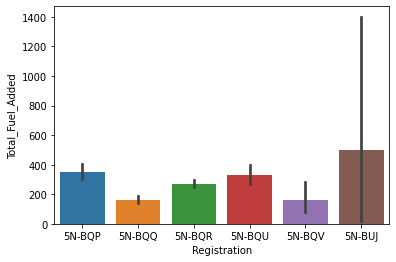

In [39]:
sns.barplot(x='Registration', y='Total_Fuel_Added', data=df, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


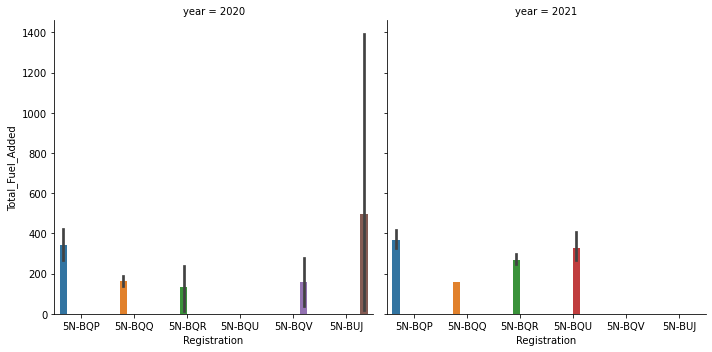

In [40]:
sns.factorplot(x='Registration', y='Total_Fuel_Added', hue='Registration', col='year', kind='bar', data=df)

In [41]:
df['Total_Fuel_Added'].describe()

count     4537.000000
mean       297.660465
std        988.692579
min      -2017.218426
25%         80.000000
50%        240.000000
75%        360.000000
max      16880.000000
Name: Total_Fuel_Added, dtype: float64

The above shows the average total of the fuel added for each cycle in the B737. The shows that for every flight, AIR PEACE utilises the 263__ fuel.


**Checking for relationship of fuel inside the aircraft after taxing of the aircraft and fuel remaining  after the whole flight.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


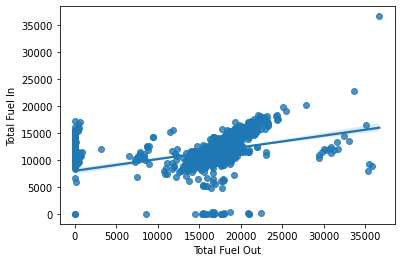

In [42]:
sns.regplot('Total Fuel Out', 'Total Fuel In', data=df)

In [59]:
x = df[['Total Fuel Out',
 'Total Fuel Off',
 'Total Fuel On',
 'Total Fuel In',
 'Taxi Burn',
 'Trip Burn',
 ]] 


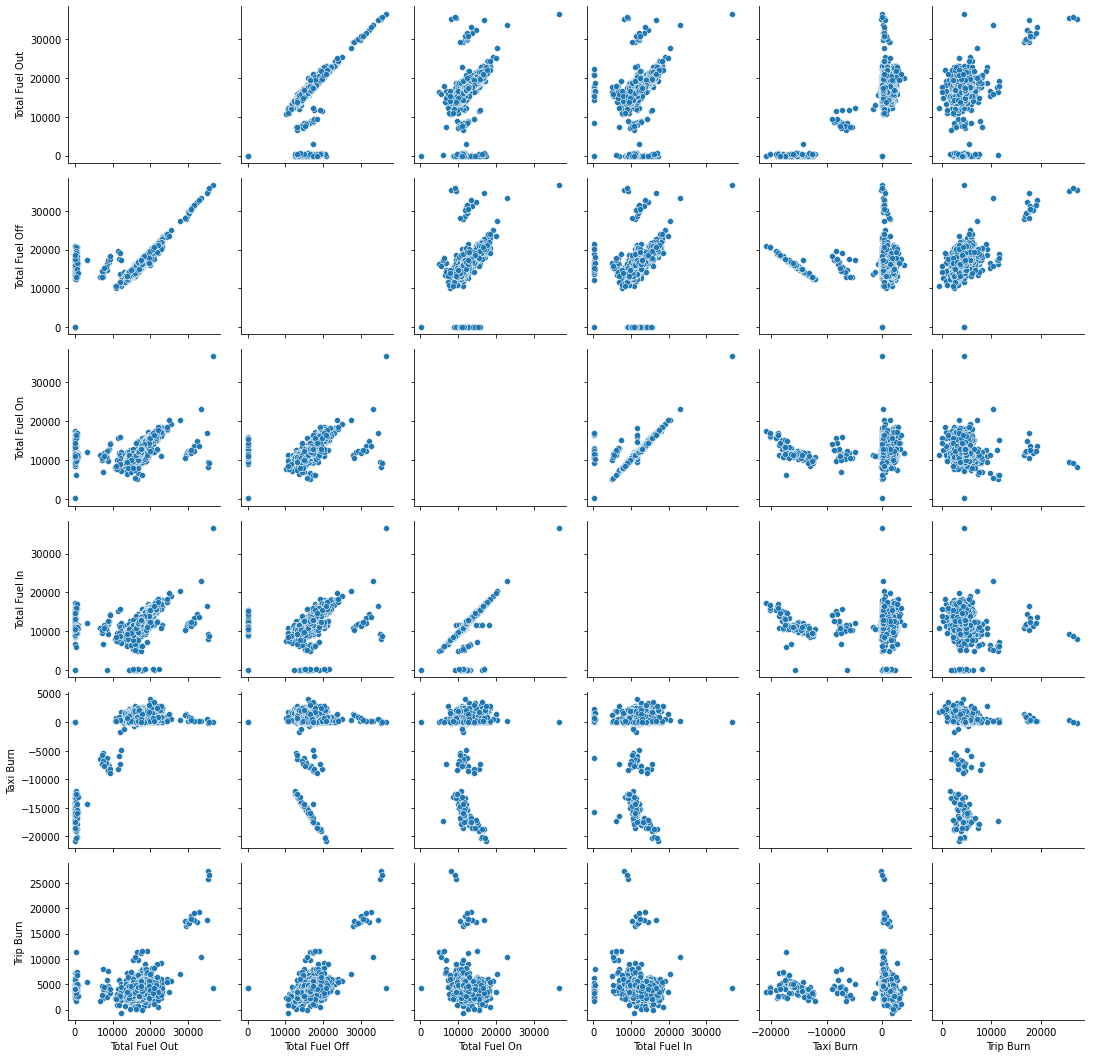

In [61]:
# g = sns.PairGrid(df)
# g.map(sns.scatterplot)
g = sns.PairGrid(x)
# g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()